<a href="https://colab.research.google.com/github/garodisk/A-B-testing-Leading-e-learning-platform-/blob/master/A_B_Testing_(leading_e_learning_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B Testing (A leading online education platform)**

# **1. Introduction**

This notebook contains a detailed report about an experiment conducted by a **leading e-learning platform** to analyze whether to include a new feature on their course overview page.

The experiment that I am talking about is **A/B testing** where some users are allotted to a control group while some are put in an experiment group and a variety of metrics and statistics designed before an experiment is analyzed to gauge whether the feature should be implemented as per the needs of the company.

**More specifically**, an experimental step would be added after the “Start Free Trial” button on the course page. Based on this experiment, after clicking on the “Start Free Trial” button, a message would be shown asking users the weekly time that they want to invest on the course. If the input hours is below 5 hours per week, “a message would appear indicating that the course usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.”

The **goal of the experiment** is reducing the number of students who would quit the course during the starting 14days period, while leaving the number of studnets who pass this 14days period intact. I would like to call the first group of students, “frustrated”, and the second group, “resolute” students.

I have provided the following image based on the provided data on Final Project Instructions and Baseline Values.

**Contents:**

**1) Introduction**

**2) Metric Choice**

**3) Measure of variability**

**4) Sizing**

**5) Sanity Check**

**6) Effect Size Tests**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving image.PNG to image.PNG


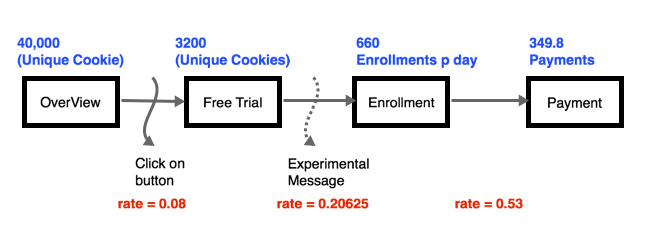

In [12]:
from IPython.display import Image
Image('image.PNG')
Image("image.PNG", width=550, height=250)

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn’t have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, the company could **improve the overall student experience** and improve coaches’ capacity to support students who are likely to complete the course.

The **unit of diversion is a cookie**, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

# **2. Metric Choice**


We need two groups of metrics. One group for measuring the effect of change that is imposed, and one group for sanity check, i.e. validation of the test.

The former is called the **Evaluation metric** and the later is called the invariant metric. Evaluation metric are those metrics which we want to use to analyze the change that is it must be sensitive to the changes that we are looking to incorporate.

**Invariant metric** are in general expected to be robust and not change and therefore we expect invariant metric to be same in the experiment and the control group.

***Detailed Analysis of each metric***

**1) Number of Cookies**: That is, number of unique cookies to view the course overview page. (dmin=3000) - Definitely this metric is not affected by the experiment, so this cannot be an evaluation metric. However, it can be an “invariant metric”, since the number of cookies should be more or less the identical in both experiment and control groups.

**2) Number of user-ids**: That is, number of users who enroll in the free trial. (dmin=50) - This can be an evaluation metric, since we expect the number of students who enroll remains the same.

**3) Number of clicks**: That is, number of unique cookies to click the “Start free trial” button (which happens before the free trial screener is trigger). (dmin=240) - This metric cannot be an evaluation measure since at this point of the process, the change is not affected the users yet. It can be an invariant metric.

**4) Click-through-probability**: That is, number of unique cookies to click the “Start free trial” button divided by number of unique cookies to view the course overview page. (dmin=0.01) - It can be an invariant metric.

**5) Gross conversion**: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the “Start free trial” button. (dmin= 0.01) - It can be an evaluation metric. The value should be reduced in the experiment group since the number of enrollments is expected to decrease.

**6) Retention**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01) - This can be an evaluation metric. Since we expect that the number of enrollment reduces, and the number of payments remains more or less the same, this metric is expected to be more in the experiment group comparing to the control group.

**7) Net conversion**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the “Start free trial” button. (dmin= 0.0075) - This can be an evaluation metric. The number of clicks is unaffected by the change, the number of payments is expected to remain more or less the same, so the change of this metric is expected to be insignificant.
In order to choose the evaluation metric, we should remember what we wanted to evaluate. First, the number of “frustrated” stduents, and second, the number of “resolute” students.

The number of **user-ids** would be lower in the experiment group, but what does it measure? The possible reduction can be related to both “frustrated” and “resolute” groups. So this metric is not distinctive. The **Gross Conversion** can measure the “frustrated” students. Both the unit of diversion, and the unit of analysis are different in this metric. The **Net Conversion** can measure the “resolute” students. This is a must have metric. The **Retention** can measure the “frustrated” students, hand-in-hand with the net conversion.

So the last three can be chosen as evaluation metircs, and I choose all three now, but the required number of observation may change this set.

# **3. Measure of variability**

Now, let's calculate the variability of the metrics. It is probably the “standard deviation of the sampling distribution” or standard error(SE), rather than the simple standard deviation. The standard error of the current metrics depends on the sample size, and can be computed either **analytically** or **empirically**. Computing it analytically means using an assumption that it follows a statistical distribution (like normal) and using the central limit theorem to calculate it. In general in a real world scenario, it is always useful to calculate it both analytically and empirically ( **using A/A tests**) as empirical calculations are better estimates since they don't have any assumptions though it requires more resources when it comes to time and money. Here, I will use just analytical calculations for our purpose.


I would rather go empirically but it is insisted to use analytical method.

Since the daily unique cookies of the overview page is 5000, we need to figure out sample size for each metric. The sample size is equal to the denominator quantity, assuming 5000 unique cookies for the overview page.

The formula which is used here for estimation of the standard error is based on CLT, and the fact that sampling distribution of the metrics has normal distribution.

Now, let us import the file that containss our **baseline values** which will be used in our analysis.

In [0]:
import numpy as np
import pandas as pd

In [13]:
from google.colab import files
uploaded = files.upload()

Saving baseline_vals.csv to baseline_vals.csv


In [15]:
df_basevals = pd.read_csv("baseline_vals.csv", index_col=False,header = None, names = ['metric','baseline_val'])
df_basevals.metric = df_basevals.metric.map(lambda x: x.lower())
df_basevals

,metric,baseline_val
0,unique cookies to view page per day:,40000.000000
1,"unique cookies to click ""start free trial"" per...",3200.000000
2,enrollments per day:,660.000000
3,"click-through-probability on ""start free trial"":",0.080000
4,"probability of enrolling, given click:",0.206250
5,"probability of payment, given enroll:",0.530000
6,"probability of payment, given click",0.109313


Now, we will assume that the daily unique cookies that views the course overview page is 5000. Using this and the information given in the baseline table let's use the binomial distribution to calculate the standard deviation of 3 metrics - 

**1)probability of enrolling, given click**

**2)probability of payment, given enroll**

**3)probability of payment, given click**

In [18]:
#probability of enrolling, given click

round(np.sqrt((.206250*(1-.206250))/(5000*3200/40000)),4)

0.0202

In [23]:
#probability of payment, given enroll

round(np.sqrt((.53*(1-.53))/(5000*660/40000)),4)

0.0549

In [22]:
#probability of payment, given click

round(np.sqrt((.109313*(1-.109313))/(5000*3200/40000)),4)

0.0156

Still, there are questions. If we have the ratios from historic data, i.e. retrospective studies, we should have the standard deviation of the metric in the theoretical population, shouldn’t we? Moreover, the theoretical distribution may not hold, so it is better to gather data and use bootstrapping to estimate these standard deviations, or better to say, standard errors.

At last, why do we need these values if we are not supposed to use them?

# **4. Sizing**


This is the more interesting part of the report. In any experiment design, determination of the sample size is a fundamental step. Based on the distribution of the metric, the sample size is a function of some parameters such as alpha, i.e. significance level, beta, false negative probability or type II error, baseline conversion, practical significance and so.

If we use this sample-size calculator (http://www.evanmiller.org/ab-testing/sample-size.html), then the sample size for each metric would be as follows:

**1)** **Net conversion - 27413**

**2)** **Retention - 39115**

**3)** **Gross Conversion - 25835**


These are the sample-sizes of one group of the experiment, so for the whole experiment we need to double each digit.

There are two points here. First, I did not adjust significant level based on the fact that we have multiple metrics. Bonferroni is one approach to such adjustment, and there are more approaches to do so. I did not adjust, because these metrics are closely related to each other, and Bonferroni would be too conservative, cause inflamation of the sample sizes. Even now these sample sizes are very high, as we will see, when we consider the unique cookie number of overview page visitors. It is possible to reduce the alpha in order to reduce the false positive probability of the whole test anyway.

The second point is about the previous step, where variability of the metrics were calculated. Did we use those variabilities? No! Here using the sample-size calculator is simplification of the problem. 


**Summary:**

**Metric 1**  Gross Conversion

Baseline Conversion: 20.625%

Minimum Detectable Effect: 1%

alpha: 5%

beta: 20%

1 - beta: 80%

sample size = 25,835 enrollments/group

Number of groups = 2 (experiment and control)

total sample size = 51,670 enrollments

clicks/pageview: 3200/40000 = .08 clicks/pageview

pageviews = 645,875

**Metric 2** Retention

Baseline Conversion: 53%

Minimum Detectable Effect: 1%

alpha: 5%

beta: 20%

1 - beta: 80%

sample size = 39,155 enrollments/group

Number of groups = 2 (experiment and control)

total sample size = 78,230 enrollments

enrollments/pageview: 660/40000 = .0165 enrollments/pageview

pageviews = 78,230/.0165 = 4,741,212

**Metric 3** Net Conversion

Baseline Conversion: 10.9313%

Minimum Detectable Effect: .75%

alpha: 5%

beta: 20%

1 - beta: 80%

sample size = 27,413 enrollments/group

Number of groups = 2 (experiment and control)

total sample size = 54,826

clicks/pageview: 3200/40000 = .08 clicks/pageview

pageviews = 685,325


In all the 3 cases, the **pageviews** required is huge.

Based on the above summary, over 4 milion unique cookies are needed for the experiment. Considering 40,000 unique cookies per day for the company, as stated in Baseline Values, we need almost 119 days for this experiment. Too long!

We need to reduce this duration, considering the fact that we do not want to guide 100% of the traffic to the experiment. The reason is, the experiment may cause some unexpected side-effects, so it is better not to expose all traffic to it.

We can loosen the power of the test, and increase the alpha for the retention, since this metric is our bottleneck. Or increase the practical significance to 2%, instead of the default 1%. Then the total unique cookies required would be 1,185,455, and the minimum days would be reduced to 30.

Increasing the practical significance means that even though the change in the metric is statistically significant and practically significant based on the old criterion, now we deem it as insignificant. A good decision?

To me it is worth trying, but the provided data about the traffic is insufficient for keeping the retention. So we drop the retention, and continue with the net and gross conversion metrics.

If we drop the retention metric, then the net conversion would rule the sample-sizing, and the experiment needs at least 18 days. With 60% traffic, it would be 29 days.

# **5. Sanity Check**

Now, for the provided data, lets do the sanity check for all the metrics

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Final Project Results - Control.csv to Final Project Results - Control (2).csv


In [0]:
df_control = pd.read_csv("Final Project Results - Control.csv")

In [56]:
from google.colab import files
uploaded = files.upload()

Saving Final Project Results - Experiment.csv to Final Project Results - Experiment (3).csv


In [0]:

df_experiment = pd.read_csv("Final Project Results - Experiment.csv")

In [58]:
df_control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [63]:
df_experiment

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0
5,"Thu, Oct 16",9500,788,129.0,61.0
6,"Fri, Oct 17",9088,780,127.0,44.0
7,"Sat, Oct 18",7664,652,94.0,62.0
8,"Sun, Oct 19",8434,697,120.0,77.0
9,"Mon, Oct 20",10496,860,153.0,98.0


In [0]:
df_experiment.drop(index = 37, inplace=True)

In [64]:
df_experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


Basically, df_control and df_experiment contains everyday data on the control and experiment group ( Number of Pageviews, clicks, enrollments, payments, etc )

The meaning of each column is:

**Pageviews**: Number of unique cookies to view the course overview page that day.

**Clicks**: Number of unique cookies to click the course overview page that day.

**Enrollments**: Number of user-ids to enroll in the free trial that day.

**Payments**: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [65]:
results = {"Control":pd.Series([df_control.Pageviews.sum(),df_control.Clicks.sum(),
                                  df_control.Enrollments.sum(),df_control.Payments.sum()],
                                  index = ["cookies","clicks","enrollments","payments"]),
           "Experiment":pd.Series([df_experiment.Pageviews.sum(),df_experiment.Clicks.sum(),
                               df_experiment.Enrollments.sum(),df_experiment.Payments.sum()],
                               index = ["cookies","clicks","enrollments","payments"])}
df_results = pd.DataFrame(results)
df_results

,Control,Experiment
cookies,345543.0,344660.0
clicks,28378.0,28325.0
enrollments,3785.0,3423.0
payments,2033.0,1945.0


The first step in validation of the experiment is assessment of invariant metrics. There are some metrics that are expected to have more or less identical values in the both experiment and control groups.

From the metrics that we have, I have chosen the number of cookies, number of clicks, and click-through probability as invariant metrics. Now using this data, I check whether the values of these metrics are significantly different in the experiment and control groups.

For the counts metrics, we assumed that 50% of the experiment traffic goes to the experiment group and 50% goes to the control group. If we call these two groups success and failure, then the model can be a Bernoulli distribution. So I would check whether the current counts of these two groups can come from a population with 0.5 change of success or failure. And I do it using bootstrapping to estimate and build confidence interval.

Null Hypothesis: Status quo. Any difference between the metric value of the two groups is due to chance. Alternate Hypothesis: The difference between the metric value of the two groups is meaningful, and significant. It cannot be due to random change.

It is said in the course that we should calculate the fraction of the control group on the total. It can be the difference of the numbers of the two groups, or relative size of each group to another one. There are different ways anyway.

In [66]:
df_results['Total']=df_results.Control + df_results.Experiment
df_results['Prob'] = 0.5
df_results['StdErr'] = np.sqrt((df_results.Prob * (1- df_results.Prob))/df_results.Total)
df_results["MargErr"] = 1.96 * df_results.StdErr
df_results["CI_lower"] = df_results.Prob - df_results.MargErr
df_results["CI_upper"] = df_results.Prob + df_results.MargErr
df_results["Obs_val"] = df_results.Experiment/df_results.Total
df_results["Pass_Sanity"] = df_results.apply(lambda x: (x.Obs_val > x.CI_lower) and (x.Obs_val < x.CI_upper),axis=1)
df_results['Diff'] = abs((df_results.Experiment - df_results.Control)/df_results.Total)

df_results

,Control,Experiment,Total,Prob,StdErr,MargErr,CI_lower,CI_upper,Obs_val,Pass_Sanity,Diff
cookies,345543.0,344660.0,690203.0,0.5,0.000602,0.001180,0.498820,0.501180,0.499360,True,0.001279
clicks,28378.0,28325.0,56703.0,0.5,0.002100,0.004116,0.495884,0.504116,0.499533,True,0.000935
enrollments,3785.0,3423.0,7208.0,0.5,0.005889,0.011543,0.488457,0.511543,0.474889,False,0.050222
payments,2033.0,1945.0,3978.0,0.5,0.007928,0.015538,0.484462,0.515538,0.488939,True,0.022122


We can see that **cookies** and **clicks** **pass the sanity check** since the observed value lies inside the confidence interval. Now, let's do the sanity check for **click through probability**

In [67]:

control_cookies = df_results.loc['cookies','Control']
control_clicks = df_results.loc['clicks','Control']

exp_cookies = df_results.loc['cookies','Experiment']
exp_clicks = df_results.loc['clicks', 'Experiment']

## control value 
cont_p_hat = control_clicks/control_cookies

## observed value (experimental value)
exp_p_hat = exp_clicks/exp_cookies

## Standard Error
SE_ClickProb = np.sqrt((cont_p_hat * (1- cont_p_hat))/control_cookies)


## margin of error for 95% confidence interval (z = 1.96)

ME_ClickProb = SE_ClickProb * 1.96

## CI
upper_ClickProb = exp_p_hat + ME_ClickProb
lower_ClickProb = exp_p_hat - ME_ClickProb

## Sane in the membrane (yes, it passes)
print(cont_p_hat,exp_p_hat,lower_ClickProb,upper_ClickProb, SE_ClickProb, ME_ClickProb)

0.08212581357457682 0.08218244066616376 0.08126698684411665 0.08309789448821087 0.0004670682765546443 0.0009154538220471028


We can see that click through probability also passed the sanity check.

# **6. Effect Size tests**

As all sanity checks were passed, and the experiment data is validated to some extent, we can go forward and analyze the **evaluation metrics**.

What we want to do is **assessing whether the differences between evaluation metric values of the control and experiment groups are significant or not**. Previously, we had chosen gross conversion and net conversion as the two evaluation metrics.

**1) We expect the gross conversion to be lower in the experiment group since the number of enrollments should be lowered**

**2) We expect not to see any significant difference between the values of net conversion rate of the experiment and control groups.**

In [0]:
df_control_notnull = df_control[pd.isnull(df_control.Enrollments) != True]
df_experiment_notnull = df_experiment[pd.isnull(df_control.Enrollments) != True]

In [69]:
results_notnull = {"Control":pd.Series([df_control_notnull.Pageviews.sum(),df_control_notnull.Clicks.sum(),
                                  df_control_notnull.Enrollments.sum(),df_control_notnull.Payments.sum()],
                                  index = ["cookies","clicks","enrollments","payments"]),
           "Experiment":pd.Series([df_experiment_notnull.Pageviews.sum(),df_experiment_notnull.Clicks.sum(),
                               df_experiment_notnull.Enrollments.sum(),df_experiment_notnull.Payments.sum()],
                               index = ["cookies","clicks","enrollments","payments"])}
df_results_notnull = pd.DataFrame(results_notnull)
df_results_notnull

,Control,Experiment
cookies,212163.0,211362.0
clicks,17293.0,17260.0
enrollments,3785.0,3423.0
payments,2033.0,1945.0


In [70]:
df_results_notnull['Total']=df_results_notnull.Control + df_results_notnull.Experiment

df_results_notnull

,Control,Experiment,Total
cookies,212163.0,211362.0,423525.0
clicks,17293.0,17260.0,34553.0
enrollments,3785.0,3423.0,7208.0
payments,2033.0,1945.0,3978.0


In [0]:
# experiment values

enrollments_exp = df_results_notnull.loc["enrollments"].Experiment
clicks_exp = df_results_notnull.loc["clicks"].Experiment
payments_exp = df_results_notnull.loc["payments"].Experiment

# control values

enrollments_cont = df_results_notnull.loc["enrollments"].Control
clicks_cont = df_results_notnull.loc["clicks"].Control
payments_cont = df_results_notnull.loc["payments"].Control



# metrics

GrossConversion_exp = enrollments_exp/clicks_exp
NetConversion_exp = payments_exp/clicks_exp
GrossConversion_cont = enrollments_cont/clicks_cont
NetConversion_cont = payments_cont/clicks_cont

GrossConversion = (enrollments_exp + enrollments_cont)/(clicks_cont + clicks_exp)
NetConversion = (payments_cont + payments_exp)/(clicks_cont + clicks_exp)

In [72]:
print('GrossConversion: {} \nNetConversion:{}'.format(GrossConversion,NetConversion))


GrossConversion: 0.20860706740369866 
NetConversion:0.1151274853124186


In [75]:
GrossConversion_cont


0.2188746891805933

In [76]:
GrossConversion_exp


0.19831981460023174

In [0]:
def stats_prop(p_hat,z_score,N_cont,N_exp,diff):
    std_err = np.sqrt((p_hat * (1- p_hat ))*(1/N_cont + 1/N_exp))
    marg_err = z_score * std_err
    ci_lower = diff - marg_err
    ci_upper = diff + marg_err
    
    return std_err,marg_err,ci_lower,ci_upper

In [78]:

GrossConversion_diff = GrossConversion_exp - GrossConversion_cont
GrossConversion_diff

-0.020554874580361565

So the **difference in the gross conversion rate** is **-0.0205**. Now, let's check for the significance of this differences and see if there is a statistical difference to implement the feature.

In [79]:
se_gross,me_gross,cil_gross,ciu_gross = stats_prop(GrossConversion,1.96,clicks_cont,
                                                   clicks_exp,GrossConversion_diff)


print(se_gross,me_gross,cil_gross,ciu_gross)


0.004371675385225936 0.008568483755042836 -0.0291233583354044 -0.01198639082531873


The **confidence interval does not contain 0** that means the difference in the gross conversion is **statistically different** and **similar** to what we were expecting.

In [80]:
NetConversion_diff = NetConversion_exp - NetConversion_cont
NetConversion_diff

-0.0048737226745441675

So the **difference in the net conversion rate** between the experiment and the control group is **-0.0048**. As per our assumptions, the net conversion rate should not come out to be different between experiment and control group. Let's check for it.

In [82]:

se_net,me_net,cil_net,ciu_net = stats_prop(NetConversion,1.96,clicks_cont,
                                           clicks_exp,NetConversion_diff)


print(se_net,me_net,cil_net,ciu_net)


0.0034341335129324238 0.0067309016853475505 -0.011604624359891718 0.001857179010803383


The **confidence interval contain 0** that means the difference in the net conversion is **not statistically different** and **similar** to what we were expecting. We expected the net conversion rate to be almost similar.


Now, let's do a **sign test** for a final sanity check to ensure our statistical analysis.

In [0]:
df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = df_SignTest.Enrollments_x/df_SignTest.Clicks_x
df_SignTest['GrossConversion_exp'] = df_SignTest.Enrollments_y/df_SignTest.Clicks_y
df_SignTest['NetConversion_cont'] = df_SignTest.Payments_x/df_SignTest.Clicks_x
df_SignTest['NetConversion_exp'] = df_SignTest.Payments_y/df_SignTest.Clicks_y

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

In [0]:
df_SignTest = df_SignTest[cols]


In [85]:
df_SignTest.head()


,Date,GrossConversion_cont,GrossConversion_exp,NetConversion_cont,NetConversion_exp
0,"Sat, Oct 11",0.195051,0.153061,0.101892,0.049563
1,"Sun, Oct 12",0.188703,0.147771,0.089859,0.115924
2,"Mon, Oct 13",0.183718,0.164027,0.104510,0.089367
3,"Tue, Oct 14",0.186603,0.166868,0.125598,0.111245
4,"Wed, Oct 15",0.194743,0.168269,0.076464,0.112981


In [0]:
df_SignTest['GC_Sign'] = df_SignTest.GrossConversion_cont - df_SignTest.GrossConversion_exp
df_SignTest['NC_Sign'] = df_SignTest.NetConversion_cont - df_SignTest.NetConversion_exp

In [87]:
len(df_SignTest)


23

In [88]:
len(df_SignTest[df_SignTest.GC_Sign > 0])


19

In [89]:
len(df_SignTest[df_SignTest.NC_Sign > 0])


13

Out of 23 days, on 19 days, control has more Gross Conversion rate than the experiment group which is **consistent** with our previous results.

Also, for net  conversion rate case, control group has higher value for 13 days and for the other 10 daays, the experiment group has a higher value which makes sense since there shouldn't be any expected difference.

**Therefore, as per the resullts, the online elearning platform should launch the new feature.**